# Problem statement
"Predicting House Prices Based on Property Features and Location"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv("C:/Users/USER/OneDrive/Desktop/datasets/house price pridiction.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216
2,1860,2,1,Suburb,1970,306891.0121
3,2294,2,1,Urban,1996,206786.7872
4,2130,5,2,Suburb,2001,272436.2391
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.8659
49996,2854,2,2,Suburb,1988,374507.6567
49997,2979,5,3,Suburb,1962,384110.5556
49998,2596,5,2,Rural,1984,380512.6860


In [5]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216
2,1860,2,1,Suburb,1970,306891.0121
3,2294,2,1,Urban,1996,206786.7872
4,2130,5,2,Suburb,2001,272436.2391


In [6]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.8659
49996,2854,2,2,Suburb,1988,374507.6567
49997,2979,5,3,Suburb,1962,384110.5556
49998,2596,5,2,Rural,1984,380512.6860
49999,1572,5,3,Rural,2011,221618.5832


In [7]:
df.shape

(50000, 6)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.0000,1513.00000,2007.00000,2506.000000,2999.00
Bedrooms,50000.0,3.498700,1.116326,2.0000,3.00000,3.00000,4.000000,5.00
Bathrooms,50000.0,1.995420,0.815851,1.0000,1.00000,2.00000,3.000000,3.00
YearBuilt,50000.0,1985.404420,20.719377,1950.0000,1967.00000,1985.00000,2003.000000,2021.00
Price,50000.0,224827.325151,76141.842966,-36588.1654,169955.86025,225052.14115,279373.630025,492195.26


In [9]:
df.describe(include="all")

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000
unique,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,Suburb,NaN,NaN
freq,NaN,NaN,NaN,16721,NaN,NaN
mean,2006.374680,3.498700,1.995420,NaN,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,NaN,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,NaN,1950.000000,-36588.165400
25%,1513.000000,3.000000,1.000000,NaN,1967.000000,169955.860250
50%,2007.000000,3.000000,2.000000,NaN,1985.000000,225052.141150
75%,2506.000000,4.000000,3.000000,NaN,2003.000000,279373.630025


In [10]:
df.isnull()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
49995,False,False,False,False,False,False
49996,False,False,False,False,False,False
49997,False,False,False,False,False,False
49998,False,False,False,False,False,False


In [11]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [13]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [15]:
df.value_counts("Neighborhood")

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

## UNIVARIATE

C:\Users\USER\AppData\Local\Temp\ipykernel_6232\992082191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Neighborhood",palette=["red","blue","green"])


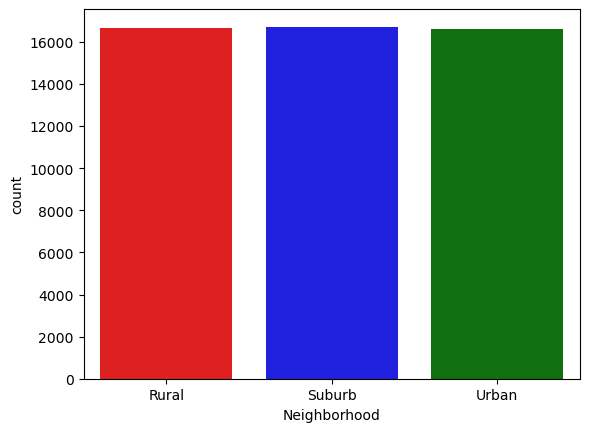

In [16]:
import matplotlib.pyplot as plt
sns.countplot(data=df,x="Neighborhood",palette=["red","blue","green"])
plt.show()

## BIVARIATE

C:\Users\USER\AppData\Local\Temp\ipykernel_6232\3968309888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_accommodates, x="Neighborhood", y="Price", palette="pastel")


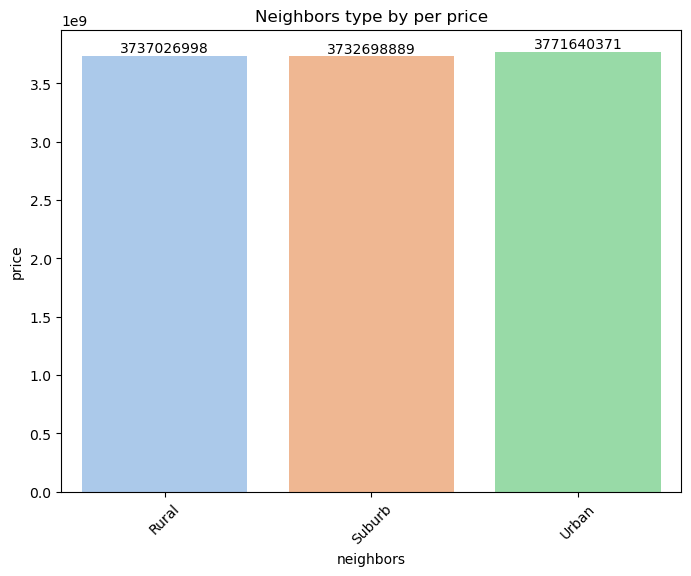

In [17]:
room_accommodates = df.groupby("Neighborhood")["Price"].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=room_accommodates, x="Neighborhood", y="Price", palette="pastel")
ax = plt.gca()
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2  
    y = bar.get_height()  
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Neighbors type by per price")
plt.xlabel("neighbors")
plt.ylabel("price")
plt.show()

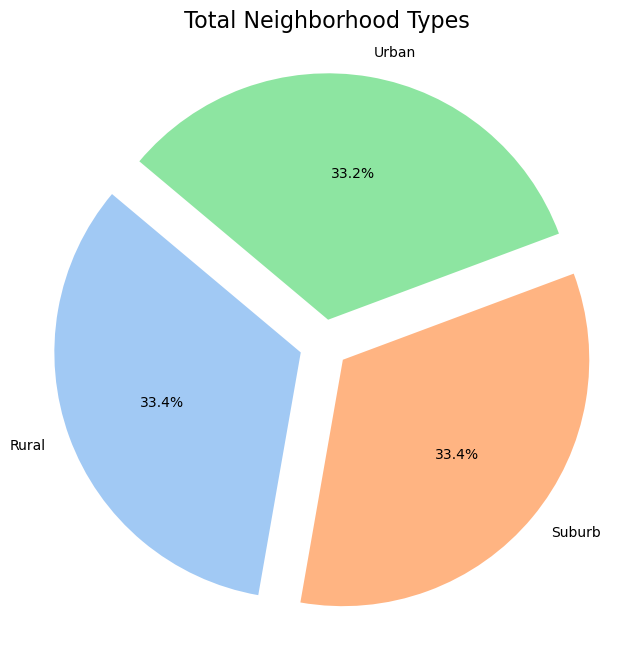

In [18]:
grouped = df.groupby("Neighborhood").size().reset_index(name="counts")
plt.figure(figsize=(8, 8))
explode = [0.1] * len(grouped)
plt.pie(
    grouped["counts"],                     
    labels=grouped["Neighborhood"],   
    autopct='%1.1f%%',                       
    startangle=140,                         
    explode=explode,                        
    colors=sns.color_palette("pastel")       
)
plt.title(" Total Neighborhood Types", fontsize=16)
plt.show()

# Multi variate

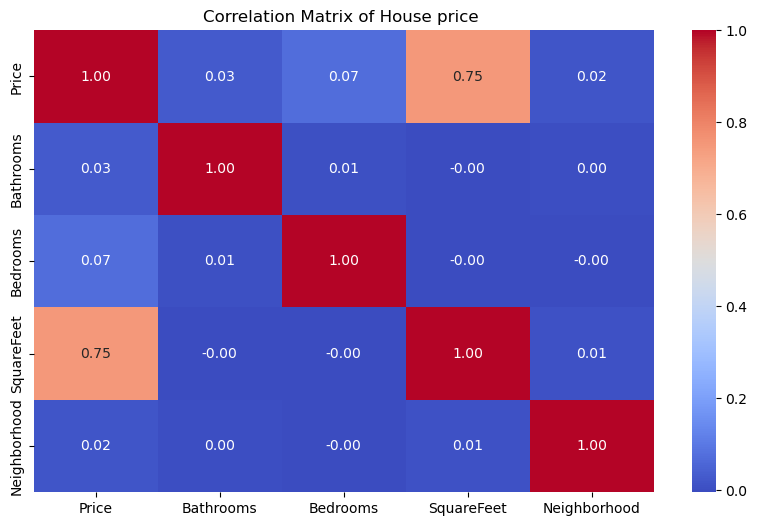

In [19]:
from sklearn.preprocessing import LabelEncoder

df['Neighborhood'] = LabelEncoder().fit_transform(df['Neighborhood'])
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Price", "Bathrooms", "Bedrooms", "SquareFeet", "Neighborhood"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of House price ")
plt.show()

In [20]:
df['Price'] = np.log(df['Price'])

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,12.280044
1,2459,3,2,0,1980,12.180828
2,1860,2,1,1,1970,12.634248
3,2294,2,1,2,1996,12.239444
4,2130,5,2,1,2001,12.515160


In [22]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [23]:
df.isnull().sum()

SquareFeet       0
Bedrooms         0
Bathrooms        0
Neighborhood     0
YearBuilt        0
Price           22
dtype: int64

In [24]:
df['Price'].fillna(df['Price'].median(numeric_only=True), inplace=True)

In [25]:
print(x.shape)
print(y.shape)

(50000, 5)
(50000,)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [27]:
x_train.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
20597,2678,2,1,2,1999
156,2051,5,1,1,1953
11276,1008,2,1,0,1961
47211,1381,4,1,0,1997
34187,2083,5,3,1,1959


In [28]:
x_test.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
42462,1348,3,2,0,1963
11769,1550,5,2,1,1969
32449,2938,5,1,1,1986
18688,2089,3,2,1,2007
20342,2978,4,3,0,1986


## label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

for column in x_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train[column] = le.fit_transform(x_train[column].astype(str))
    x_test[column] = le.transform(x_test[column].astype(str)) 

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

# linear regression

In [31]:
from sklearn.linear_model import LinearRegression
print("\n---OLS method---")
ols_model=LinearRegression()
ols_model.fit(x_train_scaled,y_train)


---OLS method---


LinearRegression()

In [32]:
#TEST DATA
from sklearn.metrics import mean_squared_error,r2_score
y_pred_ols_test = ols_model.predict(x_test)

mse_ols = mean_squared_error(y_test, y_pred_ols_test)#MSE
rmse_ols = np.sqrt(mse_ols) #RMSE
r2_ols = r2_score(y_test, y_pred_ols_test) #R square
adj_r2_ols = 1 - (1-r2_ols) * ((len(y_test)-1) / (len(y_test) - x_test.shape[1]-1))

print("MSE:",mse_ols)
print("RMSE:", rmse_ols)
print("r2_ols:", r2_ols)
print("Adjusted Rsquare:", adj_r2_ols)

MSE: 354466.78878304077
RMSE: 595.3711353290826
r2_ols: -2215227.9059794196
Adjusted Rsquare: -2216336.185400062


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [33]:
#TRAIN DATA
y_pred_ols_train = ols_model.predict(x_train)
mse_ols = mean_squared_error(y_train, y_pred_ols_train) #MSE
rmse_ols = np.sqrt(mse_ols) #RMSE
r2_ols = r2_score(y_train, y_pred_ols_train) #R square
adj_r2_ols = 1 - (1-r2_ols) * ((len(y_train)-1) / (len(y_train) - x_train.shape[1]-1))

print("MSE:",mse_ols)
print("RMSE:", rmse_ols)
print("r2_ols:", r2_ols)
print("Adjusted Rsquare:", adj_r2_ols)

MSE: 353511.11441973696
RMSE: 594.5680065557992
r2_ols: -2104866.1737703714
Adjusted Rsquare: -2105129.3216392733


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Decision tree

In [34]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(x_train)

mse_regresser = mean_squared_error(y_train, y_pred)
rmse_regresser = np.sqrt(mse_regresser)
r2_regresser = r2_score(y_train, y_pred)
adj_r2_regresser = 1 - (1 - r2_regresser) * ((len(y_train) - 1) / (len(y_train) - x_train.shape[1] - 1))


In [36]:
print(f"MSE(MSE):{mse_regresser}")
print(f"RMSE(RMSE):{rmse_regresser}")
print(f"R2(R2):{r2_regresser}")
print(f"Adjusted R2:{adj_r2_regresser}")

MSE(MSE):0.0002129077248348394
RMSE(RMSE):0.014591357881802481
R2(R2):0.9987323100667356
Adjusted R2:0.9987321515817211


In [37]:
y_pred = regressor.predict(x_test)

mse_regresser = mean_squared_error(y_test, y_pred)
rmse_regresser = np.sqrt(mse_regresser)
r2_regresser = r2_score(y_test, y_pred)
adj_r2_regresser = 1 - (1 - r2_regresser) * ((len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))


In [38]:
print(f"MSE(MSE):{mse_regresser}")
print(f"RMSE(RMSE):{rmse_regresser}")
print(f"R2(R2):{r2_regresser}")
print(f"Adjusted R2:{adj_r2_regresser}")

MSE(MSE):0.18307953238529345
RMSE(RMSE):0.4278779409893591
R2(R2):-0.14414970616988088
Adjusted R2:-0.14472212447394828


### Hyper parameter Tuning

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred_dt_best = best_dt.predict(x_test)

mse_regresser= mean_squared_error(y_test, y_pred_dt_best) #MSE
rmse_regresser= np.sqrt(mse_regresser) #RMSE
r2_regresser= r2_score(y_test, y_pred_dt_best) #R square
adj_regresser = 1 - (1-r2_regresser) * ((len(y_test)-1) / (len(y_test) - x_test.shape[1]-1))

print("MSE:",mse_regresser)
print("RMSE:", rmse_regresser)
print("r2:", r2_regresser)
print("Adjusted Rsquare:", adj_r2_regresser)

MSE: 0.07959203929694049
RMSE: 0.2821206112586255
r2: 0.5025920855892942
Adjusted Rsquare: -0.14472212447394828


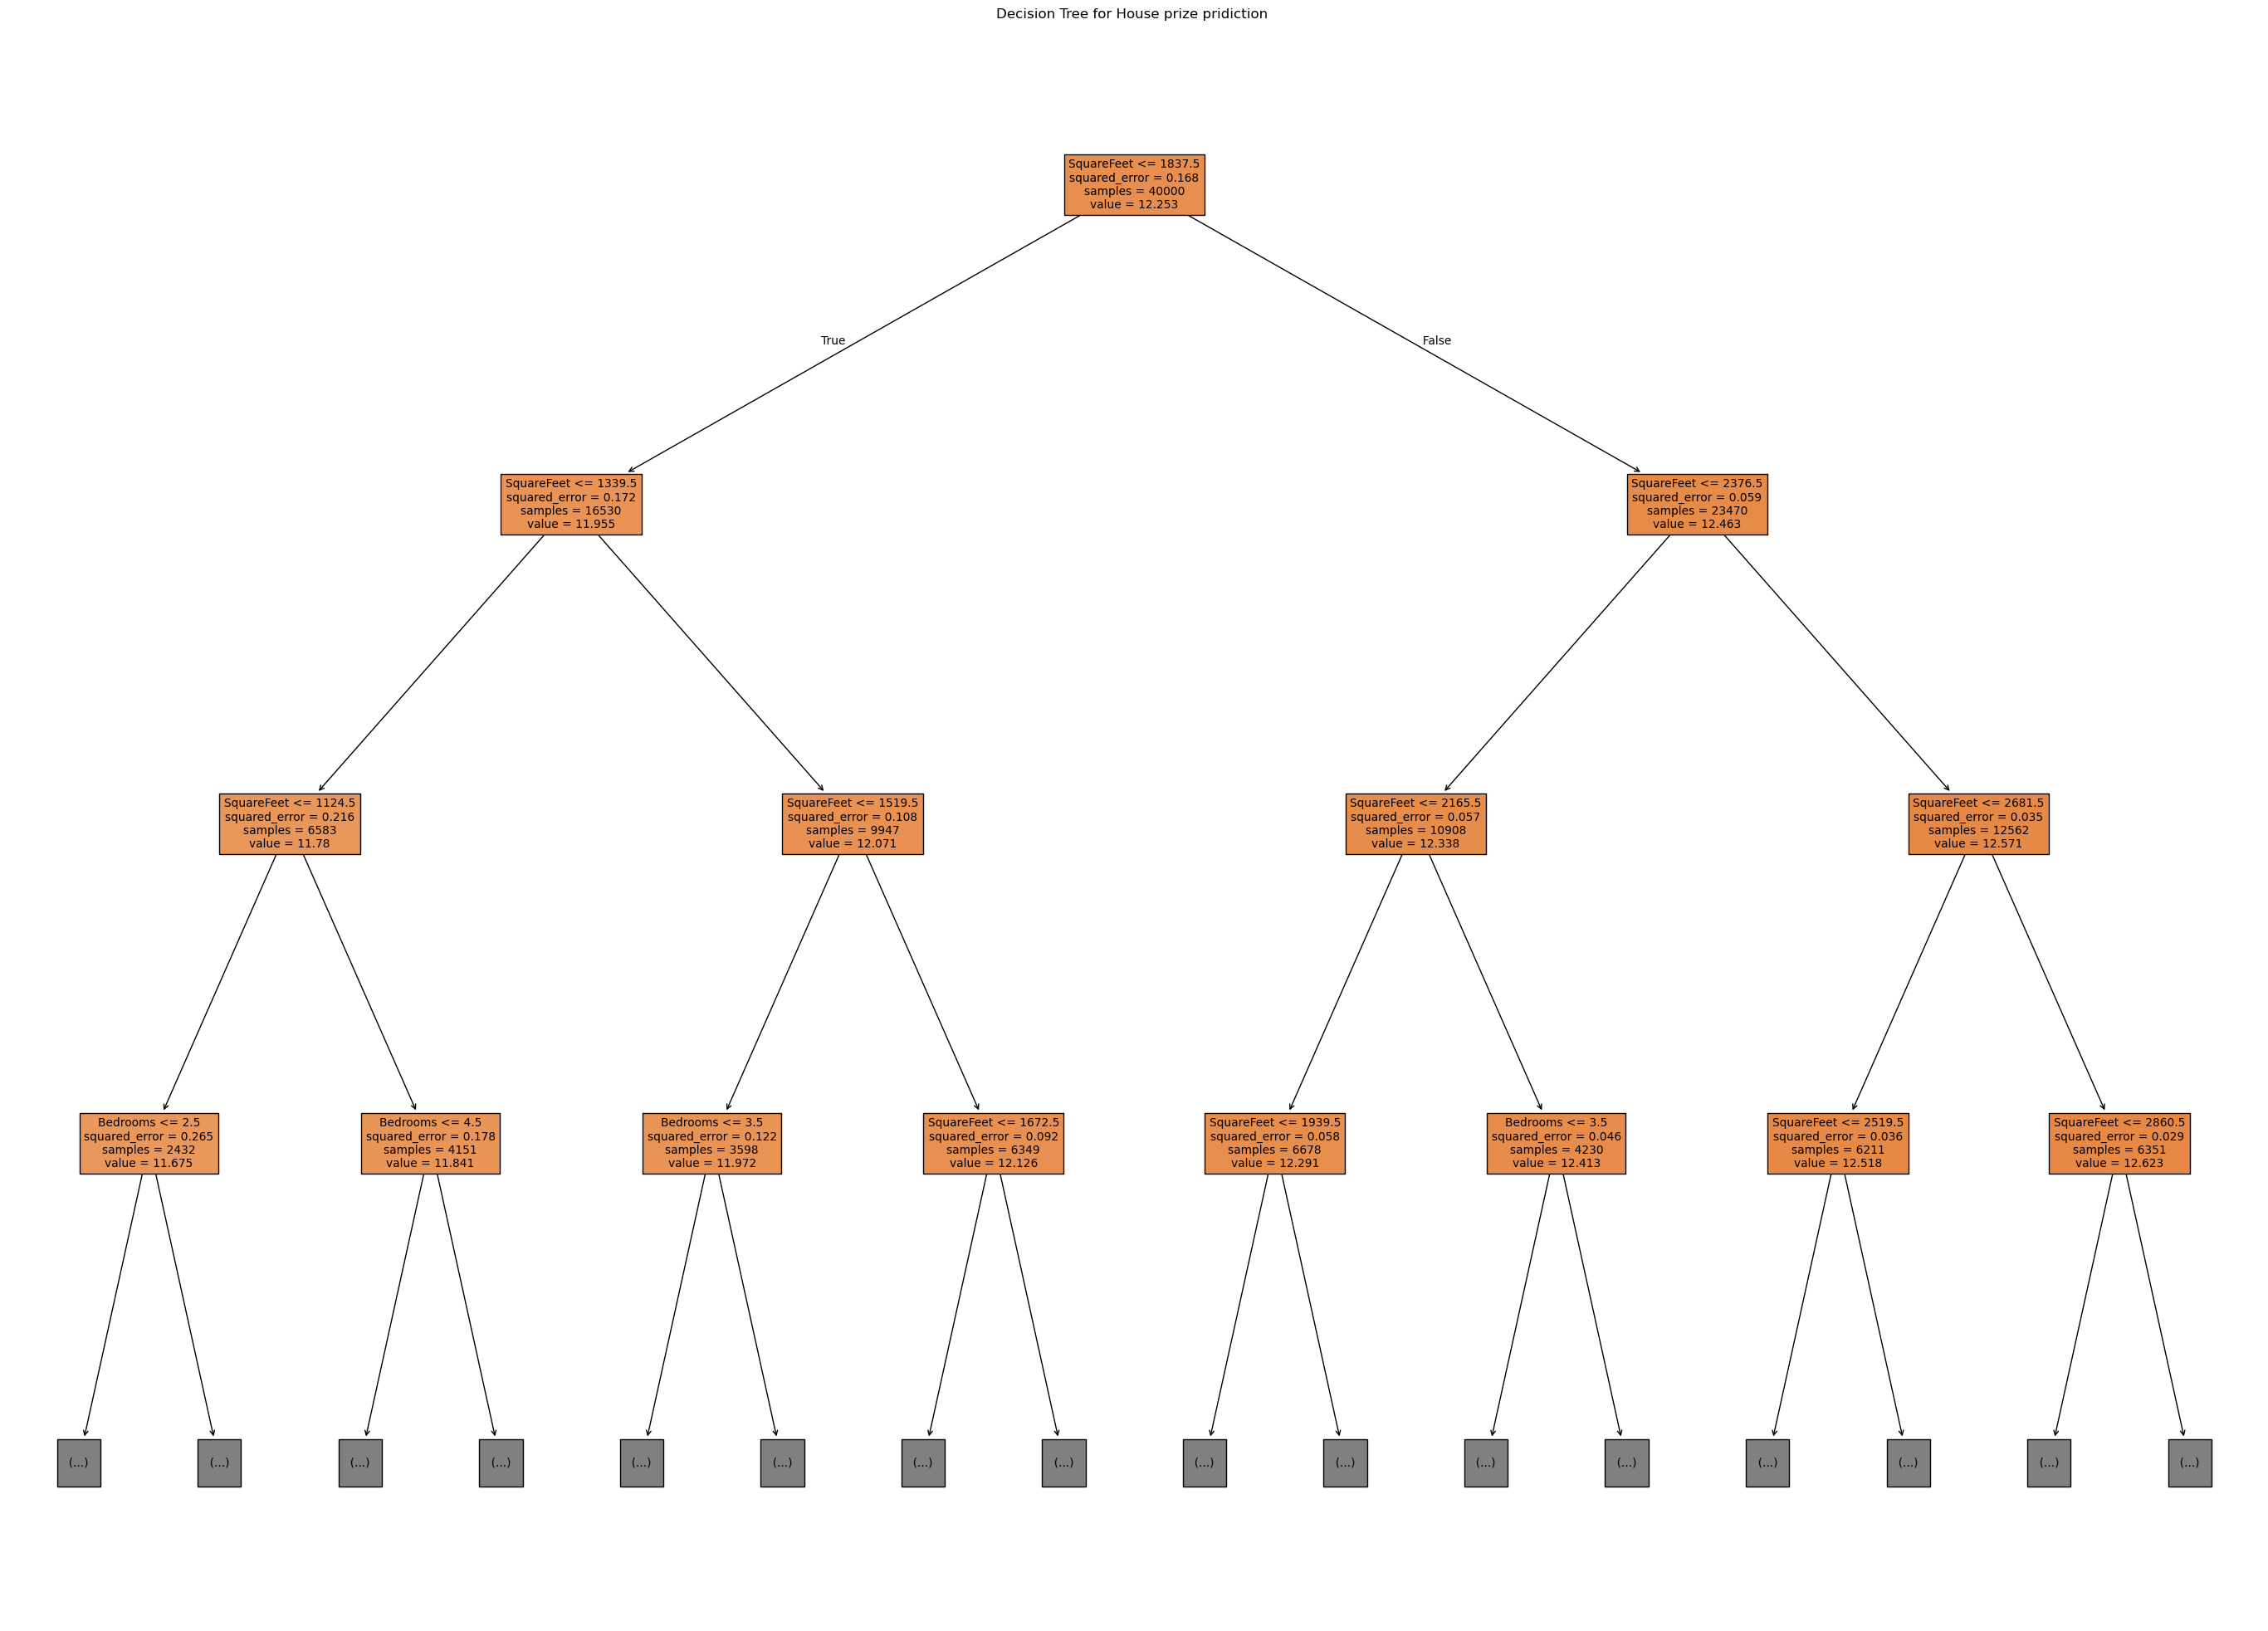

In [40]:
plt.figure(figsize=(35, 25))
plot_tree(
    regressor, 
    feature_names=x.columns, 
    filled=True,
    max_depth=3
)
plt.title("Decision Tree for House prize pridiction ")
plt.show()


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
#TRAIN DATA
y_pred_rf_train = rf.predict(x_train)

mse = mean_squared_error(y_train, y_pred_rf_train) #MSE
rmse = np.sqrt(mse) #RMSE
r2 = r2_score(y_train, y_pred_rf_train) #R square
adj_r2 = 1 - (1-r2) * ((len(y_train)-1) / (len(y_train) - x_train.shape[1]-1))

In [43]:
print(f"MSE(MSE):{mse}")
print(f"RMSE(RMSE):{rmse}")
print(f"R2(R2):{r2}")
print(f"Adjusted R2:{adj_r2}")

MSE(MSE):0.01335110810799371
RMSE(RMSE):0.11554699523567763
R2(R2):0.9205051608176356
Adjusted R2:0.9204952224719859


In [44]:
y_pred_rf = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred_rf) #MSE
rmse = np.sqrt(mse) #RMSE
r2 = r2_score(y_test, y_pred_rf) #R square
adj_r2 = 1 - (1-r2) * ((len(y_test)-1) / (len(y_test) - x_test.shape[1]-1))


In [45]:
print(f"MSE(MSE):{mse}")
print(f"RMSE(RMSE):{rmse}")
print(f"R2(R2):{r2}")
print(f"Adjusted R2:{adj_r2}")

MSE(MSE):0.09089957040635877
RMSE(RMSE):0.3014955561967021
R2(R2):0.4319260300898704
Adjusted R2:0.43164182258040973


## tuning



In [46]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred_rf_best) #MSE
rmse = np.sqrt(mse) #RMSE
r2 = r2_score(y_test, y_pred_rf_best) #R square
adj_r2 = 1 - (1-r2) * ((len(y_test)-1) / (len(y_test) - x_test.shape[1]-1))

print(f"MSE(mse):{mse}")
print(f"RMSE(rmse): {rmse}")
print(f"r2(r2):{r2}")
print(f"Adjusted Rsquare: {adj_r2}")

MSE(mse):0.07900991426573387
RMSE(rmse): 0.2810870225850597
r2(r2):0.5062300574299012
Adjusted Rsquare: 0.5059830242387015


## KNN 

In [47]:
from sklearn.neighbors import KNeighborsRegressor

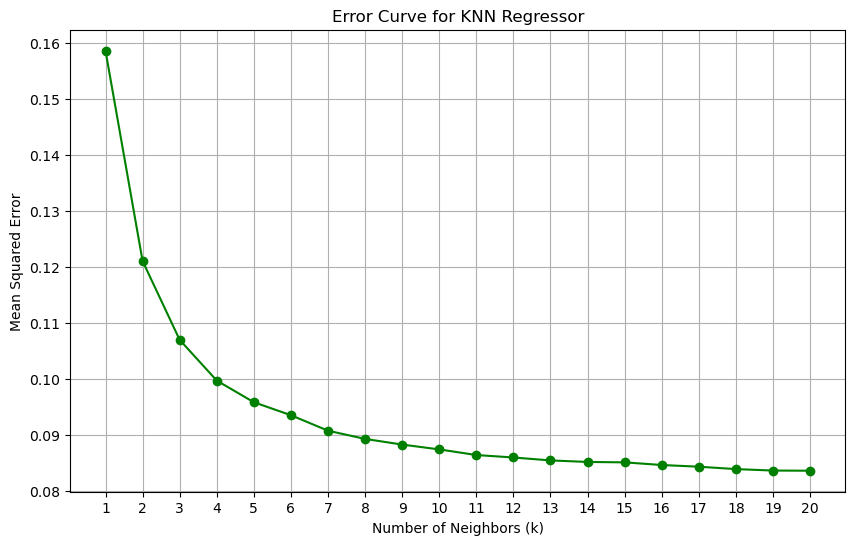

In [48]:
k_values = range(1, 21)
errors = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker="o", linestyle="-", color="g")
plt.title("Error Curve for KNN Regressor")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [49]:
k = errors.index(min(errors))+1
print("K-Value: ",k)
KNN = KNeighborsRegressor(n_neighbors=k)
KNN.fit(x_train, y_train)
#TRAIN DATA
y_train_pred = KNN.predict(x_train)

mse = mean_squared_error(y_train, y_train_pred) #MSE
rmse = np.sqrt(mse) #RMSE
r2 = r2_score(y_train, y_train_pred) #R square
adj_r2 = 1 - (1-r2) * ((len(y_train)-1) / (len(y_train) - x_train.shape[1]-1))

print("MSE:",mse)
print("RMSE:", rmse)
print("r2:", r2)
print("Adjusted Rsquare:", adj_r2)

K-Value:  20
MSE: 0.07912241113797308
RMSE: 0.2812870618033703
r2: 0.5288912876551286
Adjusted Rsquare: 0.5288323902314719


In [50]:
#Test data
y_test_pred = KNN.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred) #MSE
rmse = np.sqrt(mse) #RMSE
r2 = r2_score(y_test, y_test_pred) #R square
adj_r2 = 1 - (1-r2) * ((len(y_test)-1) / (len(y_test) - x_test.shape[1]-1))

print("MSE:",mse)
print("RMSE:", rmse)
print("r2:", r2)
print("Adjusted Rsquare:", adj_r2)

MSE: 0.08360011948511181
RMSE: 0.2891368525198955
r2: 0.47754371611918567
Adjusted Rsquare: 0.4772823311462615


## Hyper parameter Tuning

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [20, 30, 40], 
    'p': [1, 2] 
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(x_train, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn_best = best_knn.predict(x_test)

mse = mean_squared_error(y_test, y_pred_knn_best) # MSE
rmse = np.sqrt(mse) # RMSE
r2 = r2_score(y_test, y_pred_knn_best) # R square
adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))

print("MSE:",mse)
print("RMSE:", rmse)
print("r2:", r2)
print("Adjusted Rsquare:", adj_r2)

## SVM

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(x_train, y_train)
y_pred_svr_train = svr.predict(x_train)

mse = mean_squared_error(y_train, y_pred_svr_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_svr_train)
adj_r2 = 1 - (1 - r2) * ((len(y_train) - 1) / (len(y_train) - x_train.shape[1] - 1))

In [ ]:
print("MSE:",mse)
print("RMSE:", rmse)
print("r2:", r2)
print("Adjusted Rsquare:", adj_r2)

In [ ]:
#TEST DATA
y_pred_svr = svr.predict(x_test)

mse = mean_squared_error(y_test, y_pred_svr) #MSE
rmse = np.sqrt(mse) #RMSE
r2 = r2_score(y_test, y_pred_svr) #R square
adj_r2 = 1 - (1-r2) * ((len(y_test)-1) / (len(y_test) - x_test.shape[1]-1))

print("MSE:",mse)
print("RMSE:", rmse)
print("r2:", r2)
print("Adjusted Rsquare:", adj_r2)